In [1]:
import quandl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.linear_model as linear_model
from sklearn.model_selection import train_test_split
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error


In [2]:
#df = quandl.get('WIKI/GOOGL')
#df.to_csv("GOOGL.csv")

In [3]:
df = pd.read_csv("GOOGL.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3424 entries, 0 to 3423
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         3424 non-null   object 
 1   Open         3424 non-null   float64
 2   High         3424 non-null   float64
 3   Low          3424 non-null   float64
 4   Close        3424 non-null   float64
 5   Volume       3424 non-null   float64
 6   Ex-Dividend  3424 non-null   float64
 7   Split Ratio  3424 non-null   float64
 8   Adj. Open    3424 non-null   float64
 9   Adj. High    3424 non-null   float64
 10  Adj. Low     3424 non-null   float64
 11  Adj. Close   3424 non-null   float64
 12  Adj. Volume  3424 non-null   float64
dtypes: float64(12), object(1)
memory usage: 347.9+ KB


In [4]:
df["Date"] = pd.to_datetime(df["Date"])

In [5]:
data = df.set_index("Date")["Adj. Close"]
data = data.resample("D").mean()
data = data.interpolate(method='linear')
data.info()

<class 'pandas.core.series.Series'>
DatetimeIndex: 4969 entries, 2004-08-19 to 2018-03-27
Freq: D
Series name: Adj. Close
Non-Null Count  Dtype  
--------------  -----  
4969 non-null   float64
dtypes: float64(1)
memory usage: 77.6 KB


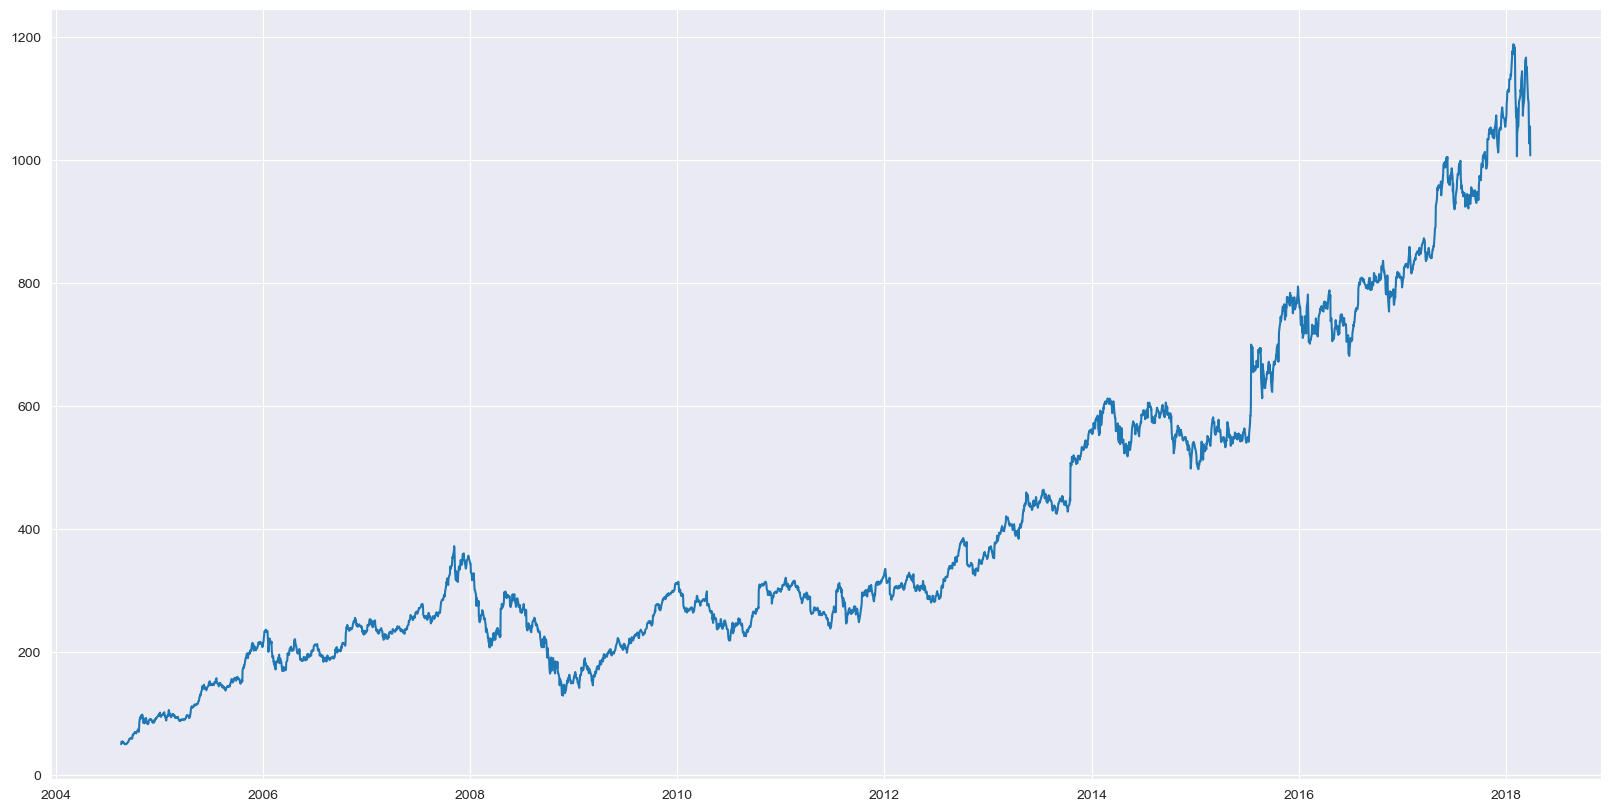

In [6]:
plt.figure(figsize=(20, 10))
plt.plot(data)

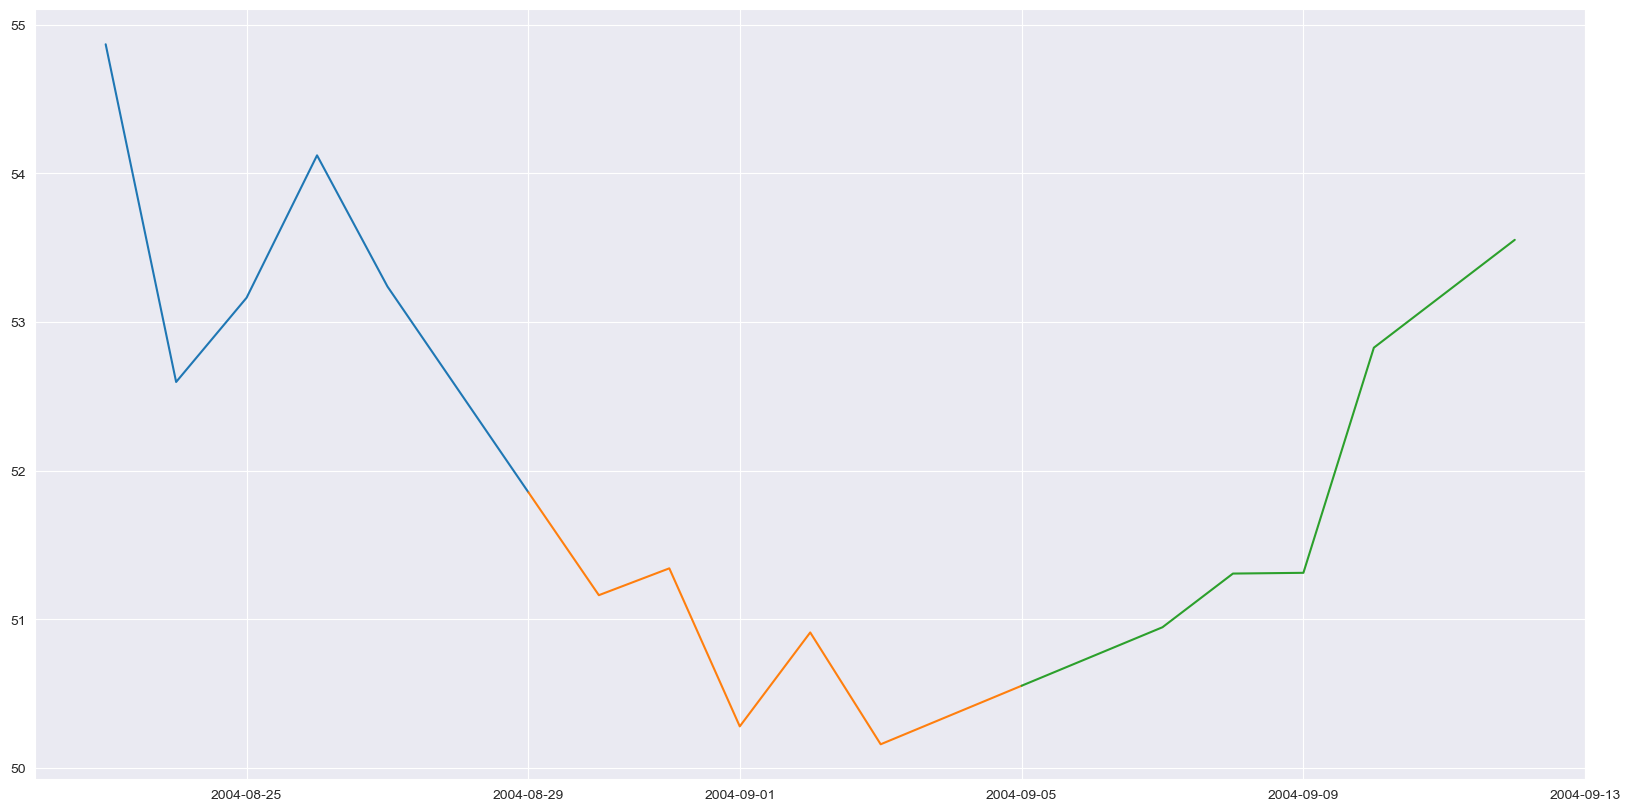

In [7]:
plt.figure(figsize=(20, 10))
plt.plot(data[4:11])
plt.plot(data[10:18])
plt.plot(data[17:25])

In [8]:
data = data.reset_index("Date")
data['Day'] = data['Date'].dt.day
data['Week'] = data['Date'].dt.isocalendar().week
data['DayOfWeek'] = data['Date'].dt.dayofweek
data['Month'] = data['Date'].dt.month
data['Quarter'] = data['Date'].dt.quarter
data['Year'] = data['Date'].dt.year

<Axes: xlabel='Year', ylabel='Adj. Close'>

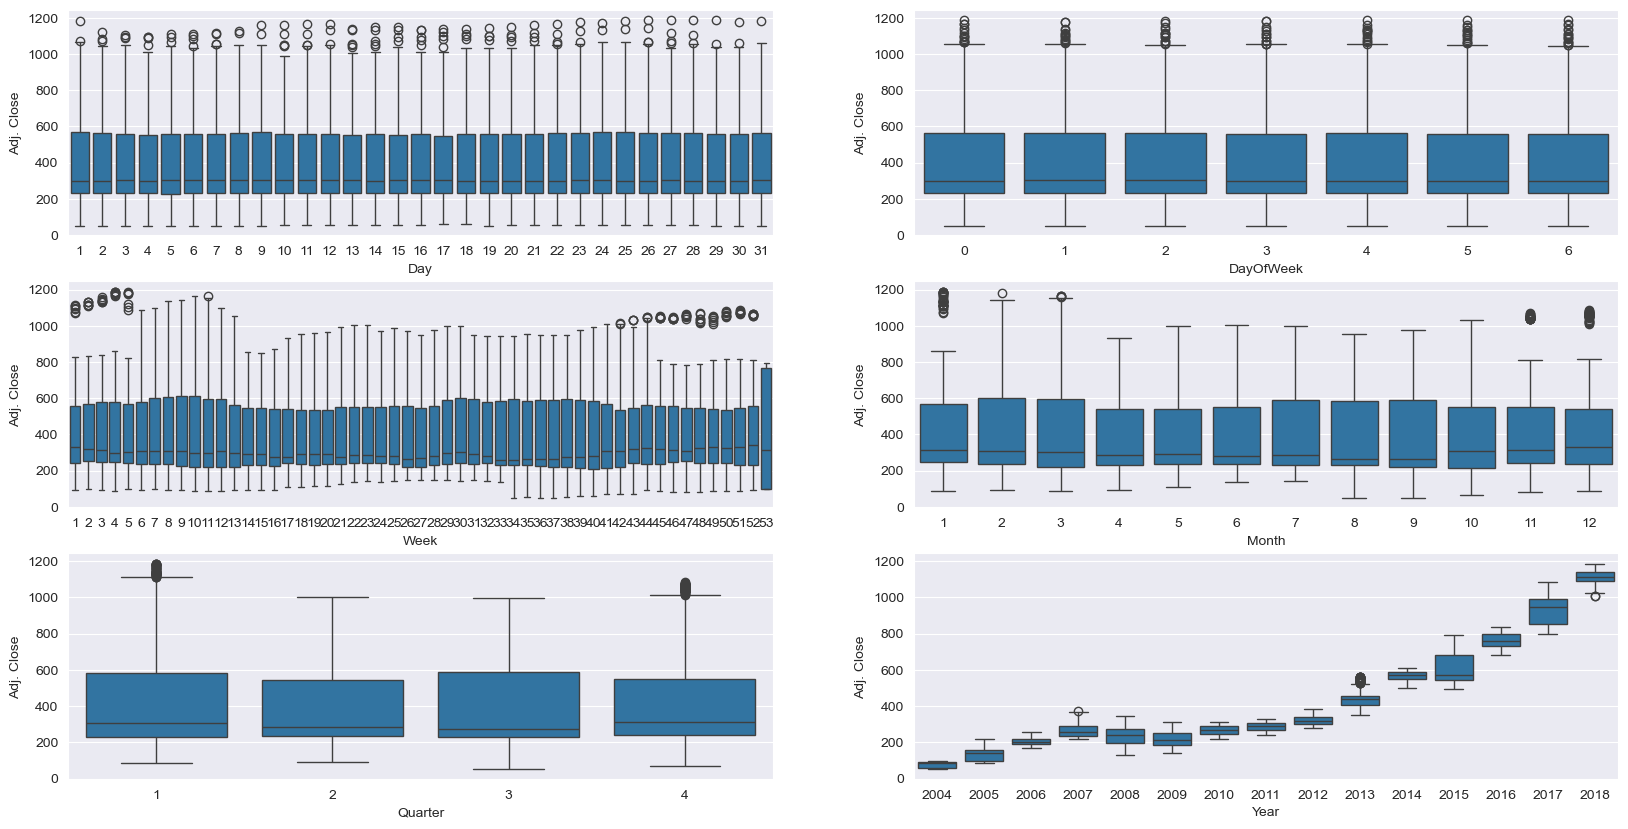

In [9]:
fig, ax = plt.subplots(3,2,figsize=(20, 10))
sns.boxplot(x="Day", y="Adj. Close", data=data,ax=ax[0,0])
sns.boxplot(x="DayOfWeek", y="Adj. Close", data=data,ax=ax[0,1])
sns.boxplot(x="Week", y="Adj. Close", data=data,ax=ax[1,0])
sns.boxplot(x="Month", y="Adj. Close", data=data,ax=ax[1,1])
sns.boxplot(x="Quarter", y="Adj. Close", data=data,ax=ax[2,0])
sns.boxplot(x="Year", y="Adj. Close", data=data,ax=ax[2,1])

<Axes: >

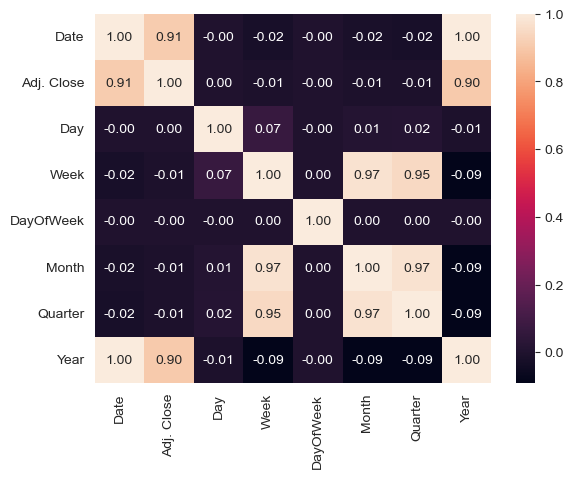

In [10]:
sns.heatmap(data.corr(),annot=True,fmt='.2f')

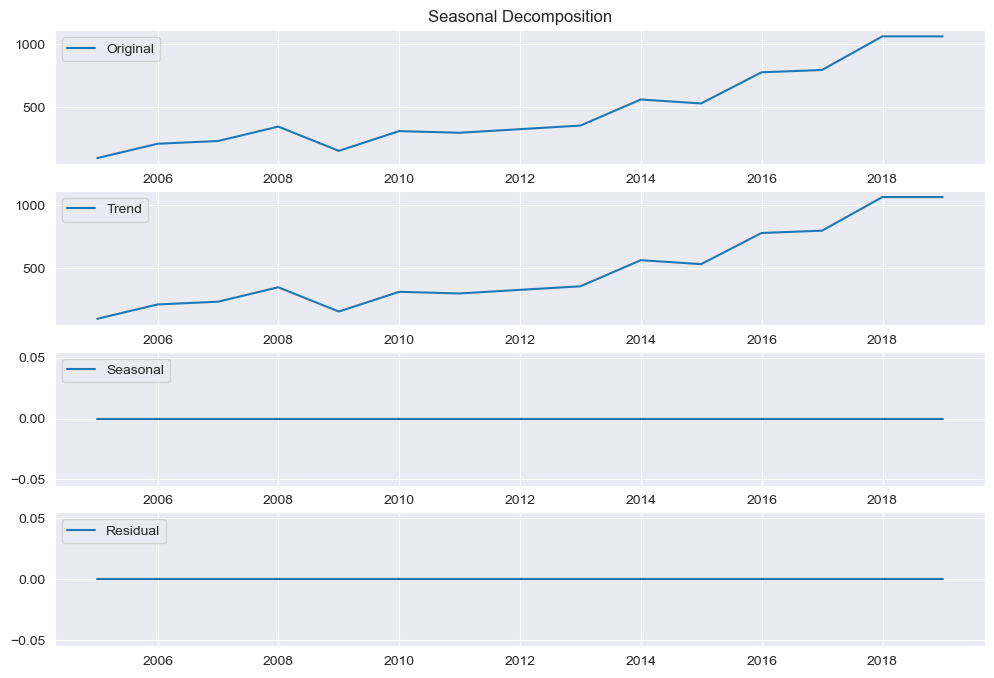

In [11]:
YearDecompose= data[["Date","Adj. Close"]].copy()
YearDecompose.set_index("Date",inplace=True)

YearDecompose = YearDecompose.resample("Y")
YearDecompose = YearDecompose.interpolate(method='linear')

Ydecomposition = seasonal_decompose(YearDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(YearDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')

plt.subplot(4, 1, 2)
plt.plot(Ydecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Ydecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Ydecomposition.resid, label='Residual')
plt.legend(loc='upper left')


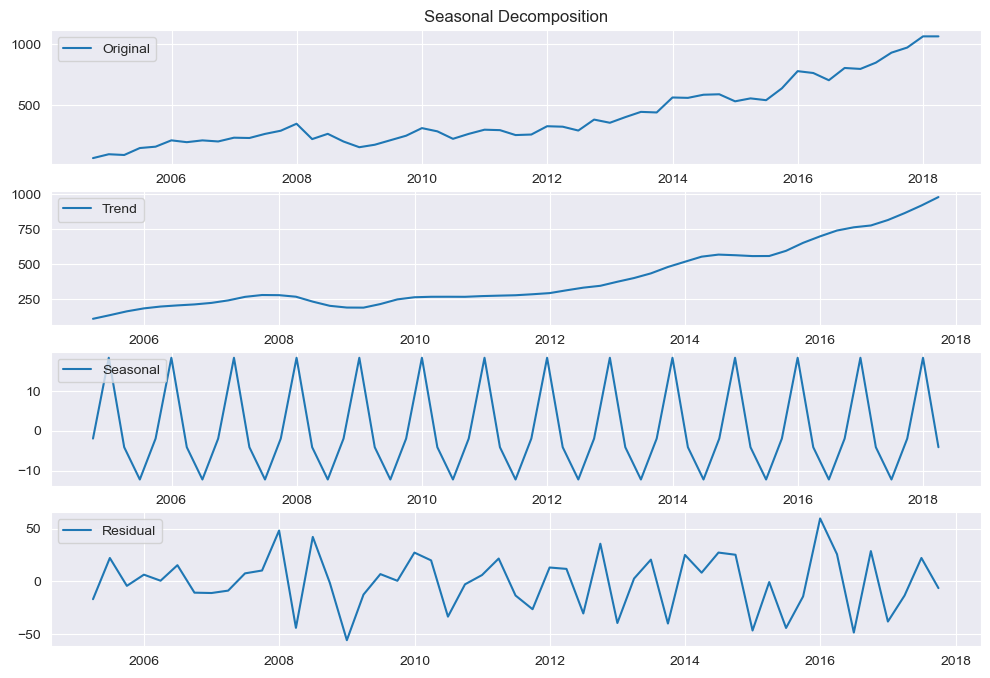

In [12]:
QuarterDecompose= data[["Date","Adj. Close"]].copy()
QuarterDecompose.set_index("Date",inplace=True)

QuarterDecompose = QuarterDecompose.resample("Q")
QuarterDecompose = QuarterDecompose.interpolate(method='linear')

Qdecomposition = seasonal_decompose(QuarterDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(QuarterDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')

plt.subplot(4, 1, 2)
plt.plot(Qdecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Qdecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Qdecomposition.resid, label='Residual')
plt.legend(loc='upper left')

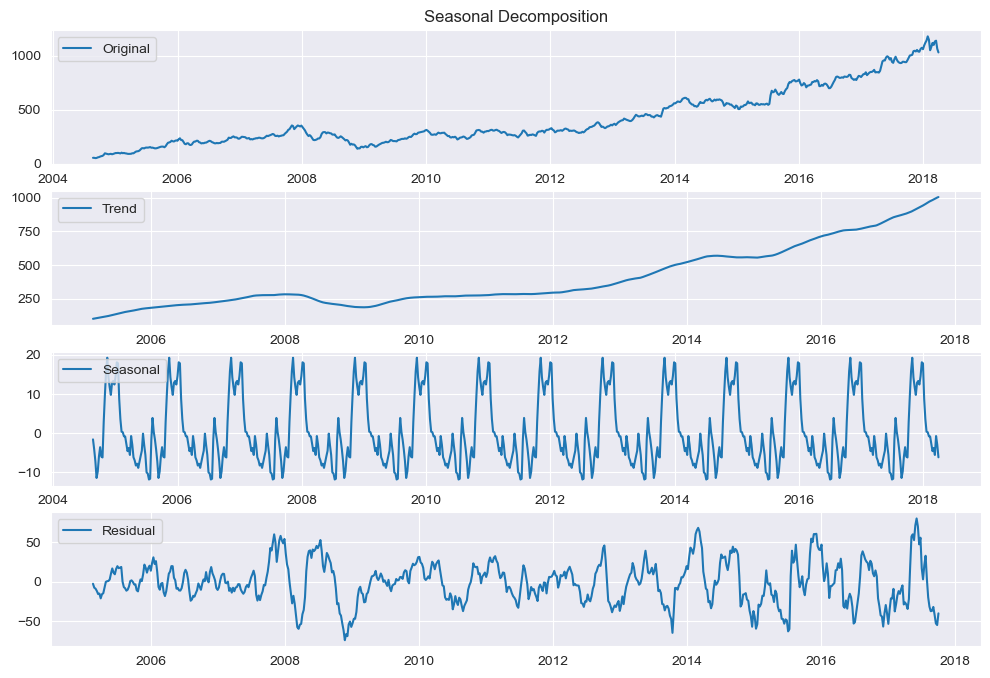

In [13]:
WeekDecompose= data[["Date","Adj. Close"]].copy()
WeekDecompose.set_index("Date",inplace=True)

WeekDecompose = WeekDecompose.resample("w").mean()
WeekDecompose = WeekDecompose.interpolate(method='linear')
Wdecomposition = seasonal_decompose(WeekDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(WeekDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')

plt.subplot(4, 1, 2)
plt.plot(Wdecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Wdecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Wdecomposition.resid, label='Residual')
plt.legend(loc='upper left')


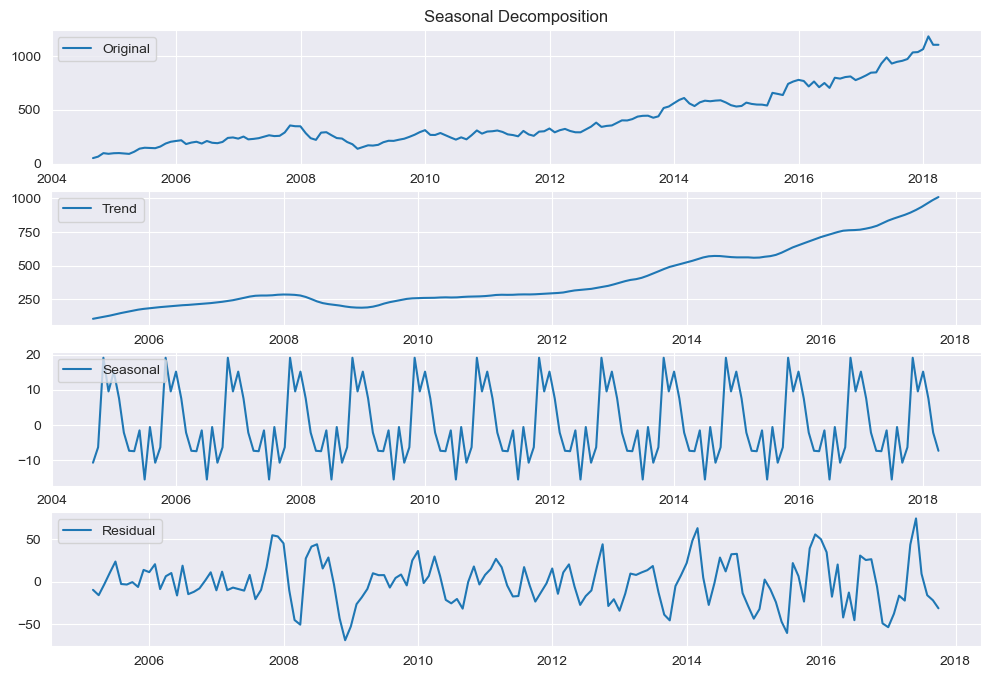

In [14]:
MonthDecompose= data[["Date","Adj. Close"]].copy()
MonthDecompose.set_index("Date",inplace=True)

MonthDecompose = MonthDecompose.resample("M")
MonthDecompose = MonthDecompose.interpolate(method='linear')

Mdecomposition = seasonal_decompose(MonthDecompose, model='additive')

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(MonthDecompose['Adj. Close'], label='Original')
plt.legend(loc='upper left')
plt.title('Seasonal Decomposition')

plt.subplot(4, 1, 2)
plt.plot(Mdecomposition.trend, label='Trend')
plt.legend(loc='upper left')

plt.subplot(4, 1, 3)
plt.plot(Mdecomposition.seasonal, label='Seasonal')
plt.legend(loc='upper left')

plt.subplot(4, 1, 4)
plt.plot(Mdecomposition.resid, label='Residual')
plt.legend(loc='upper left')

In [15]:
data["T-1"] = data["Adj. Close"].shift(1)
train_data = data.iloc[1:]
x = train_data[["Month","Week",'T-1']]
y = train_data["Adj. Close"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, shuffle=False)

0.9975465248951915
73.70868685057964


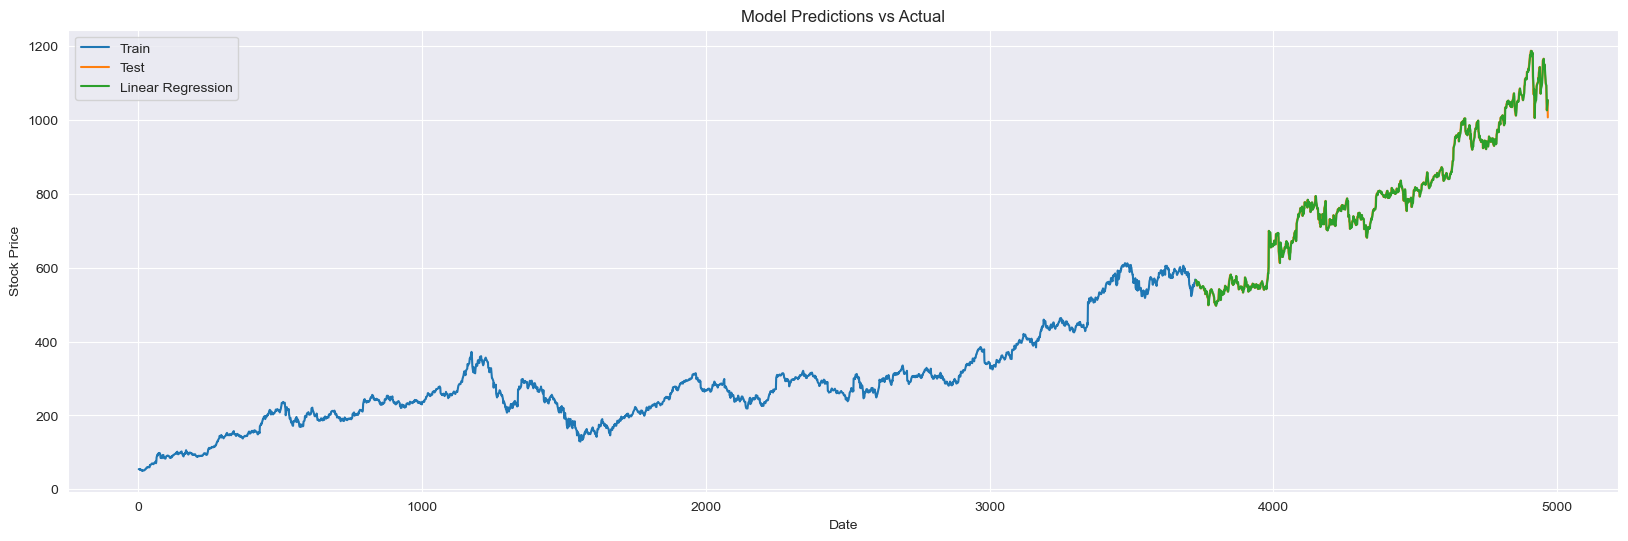

In [16]:
model = linear_model.LinearRegression()
model.fit(x_train, y_train)

plt.figure(figsize=(20, 6))
plt.plot(y_train.index, y_train, label='Train')
plt.plot(y_test.index, y_test, label='Test')
plt.plot(y_test.index, model.predict(x_test), label='Linear Regression')

plt.legend()
plt.title('Model Predictions vs Actual')
plt.xlabel('Date')
plt.ylabel('Stock Price')
print(model.score(x_test,y_test))
print(mean_squared_error(y_test,model.predict(x_test)))